In [26]:
import numpy as np

# import functions from modsim

from modsim import *

import random
import matplotlib.pyplot as plt

In [33]:
# Barnsley's Fern
f1 = System(a=0.0, b=0.0, c=0.0, d=0.16, e=0.0, f=0.0, p=0.01)
f2 = System(a=0.85, b=0.04, c=-0.04, d=0.85, e=0.0, f=1.6, p=0.85)
f3 = System(a=0.20, b=-0.26, c=0.23, d=0.22, e=0.0, f=0.6, p=0.07)
f4 = System(a=-0.15, b=0.28, c=0.26, d=0.24, e=0.0, f=0.44, p1=0.07)
system = System(f1=f1, f2=f2, f3=f3, f4=f4)

# Barnsley's Fern - Mutated
f1 = System(a=0.0, b=0.0, c=0.0, d=0.25, e=0.0, f=-0.4, p=0.02)
f2 = System(a=0.95, b=0.005, c=-0.005, d=0.93, e=-0.002, f=0.5, p=0.84)
f3 = System(a=0.035, b=-0.2, c=0.16, d=0.04, e=-0.09, f=0.02, p=0.07)
f4 = System(a=-0.04, b=0.2, c=0.16, d=0.04, e=0.083, f=0.12, p1=0.07)
system2 = System(f1=f1, f2=f2, f3=f3, f4=f4)

In [34]:
def new_point(point, system):
    """Computes a new point, based on the triangle and the point.
    
    triangle: System object with three points
    point: State object with x and y
    
    returns: State object with new x and y
    """
    
    x = point.x
    y = point.y
    
    r = random.uniform(0,1)
    if r < system.f1.p:
        xn = system.f1.a * x + system.f1.b * y + system.f1.e
        yn = system.f1.c * x + system.f1.d * y + system.f1.f
    elif r < (system.f1.p+system.f2.p):
        xn = system.f2.a * x + system.f2.b * y + system.f2.e
        yn = system.f2.c * x + system.f2.d * y + system.f2.f
    elif r < (system.f1.p+system.f2.p+system.f3.p):
        xn = system.f3.a * x + system.f3.b * y + system.f3.e
        yn = system.f3.c * x + system.f3.d * y + system.f3.f
    else:
        xn = system.f4.a * x + system.f4.b * y + system.f4.e
        yn = system.f4.c * x + system.f4.d * y + system.f4.f
        
    x = xn
    y = yn
    
    return State(x=x, y=y)

In [36]:
def run_simulation(point, system, n):
    """Computes a new point, based on the triangle and the point.
    
    triangle: System object with three points
    point: State object with x and y
    n: number of iterations
    
    returns: TimeSeries
    """
    
    #print("Starting point = ",point)
    #print("Triangle = ",triangle)
    #print("Number of iterations = ",n)
    # make a TimeSeries to store the results
    resultsX = TimeSeries()
    resultsY = TimeSeries()
    
    # run n times and store the results
    for i in range(n):
        resultsX[i] = point.x
        resultsY[i] = point.y
        point = new_point(point, system)
        #print(point)
    
    #print("Final point = ",point)

    return resultsX, resultsY

In [43]:
def plot_results(resultsX, resultsY):
    """Plot the results.
    
    results: TimeSeries
    """
    
    plt.plot(resultsX, resultsY, 'g.', label='path')

In [48]:
# create a state object to contain the position of a point in 2D

xr = 0
yr = 0

point = State(x=xr, y=yr)

#print ("Triangle = ",triangle)
#print ("Starting point = ",point)

resultsX, resultsY = run_simulation(point, system, 50000)


Text(0, 0.5, 'y')

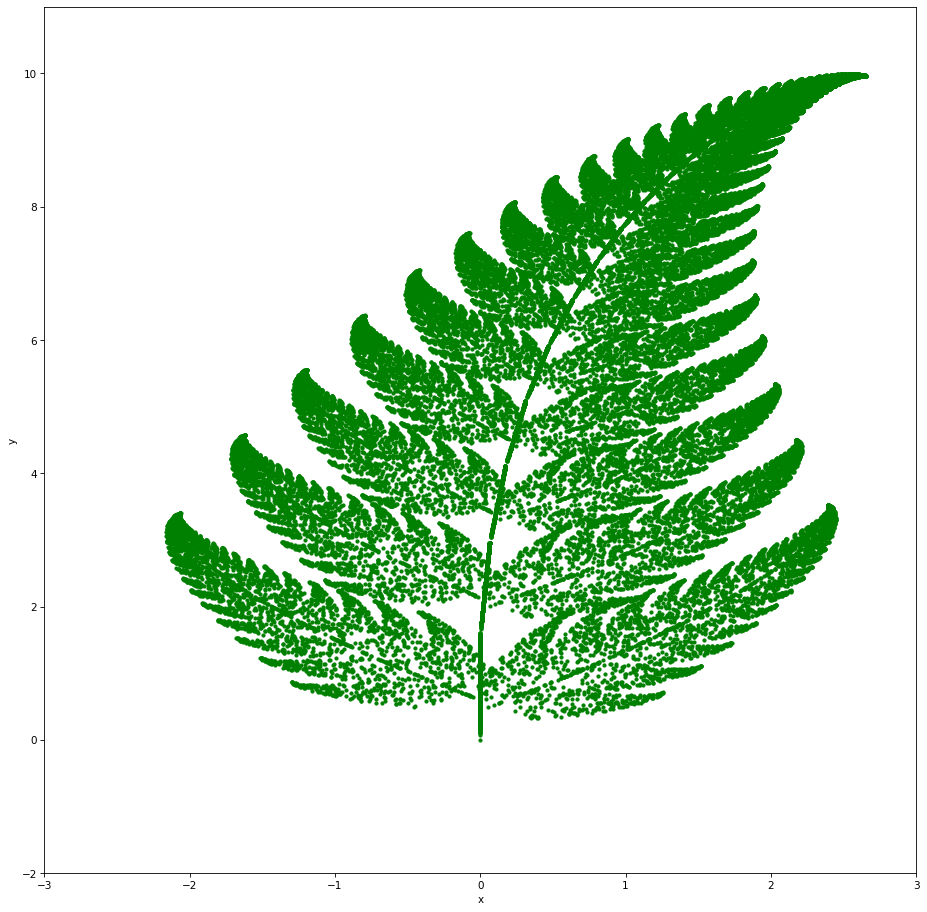

In [49]:
fig = plt.figure(figsize=(15,15))
plot_results(resultsX, resultsY)
plt.xlim(-3, 3)
plt.ylim(-2,11)
plt.xlabel('x')
plt.ylabel('y')